## 1. Khai báo thư viện

In [1]:
# Khai báo thư viện
import pandas as pd # đọc dữ liệu

# xử lý dữ liệu
import numpy as np 
import re   
from datetime import datetime, timedelta

import matplotlib.pyplot as plt # vẽ biểu đồ

## 2. Đọc dữ liệu

In [2]:
# Đọc dữ liệu từ file excel
data = pd.ExcelFile("data/DATA-SET-VÒNG-1-CUỘC-THI-DATA-GOT-TALENT-2023.xlsx")
customer = pd.read_excel(data, "customer")
ticket = pd.read_excel(data, "ticket")
film = pd.read_excel(data, "film")

## 3. Mô tả dữ liệu

In [3]:
# Kích thước dữ liệu của bảng customer
customer.shape

(4479, 7)

In [4]:
# Dữ liệu 10 dòng đầu của bảng customer
customer.head(10)

,customerid,DOB,gender,address,Website,job,industry
0,0000000014,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer
1,0000000034,35901,Nam,man thai,KH0104|0333,student,health service
2,0000000051,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics
3,0000000081,36472,Nam,truong chinh,KH0104|0293,student,economics
4,0000000098,34608,Nam,cẩm lệ,KH0104|40580,blue collar,health service
5,0000000109,36285,Nam,Tam Thuan,KH0104|0191,student,education
6,0000000221.,33985,Nam,"Cẩm Lê,Đn",KH0104|2742,blue collar,construction
7,0000000228,35012,Nam,"Ngũ Hành Sơn, ĐN",NaN,specialist,health service
8,0000000229,33617,Nam,"Lê Đình Dương, ĐN",KH0104|2716,white collar,economics
9,0000000266,34700,Nam,Le Duan,KH0104|0044,blue collar,social service


In [5]:
# Dữ liệu 10 dòng cuối của bảng customer
customer.tail(10)

,customerid,DOB,gender,address,Website,job,industry
4469,KH978498,36381,Nữ,"ĐIỀN LỘC, HUẾ",NaN,student,government agent
4470,KH9814797,36201,Nam,hòa vang,NaN,student,engineering
4471,KH9830912,36592,Nữ,"ĐIỆN BÀN, QUẢNG NAM",NaN,teenager,NaN
4472,KH9834570,35441,Nam,"Ngu Hanh Son, Da Nang",NaN,student,social service
4473,KH984255,36650,Nam,"Hai Chau, Da Nang",NaN,teenager,NaN
4474,KH9855766,34885,Nữ,"A, THUAN PHUOC,HAI CHAU, DA NANG",NaN,specialist,finance
4475,KH9958204,36892,Nữ,"Phước Mỹ, ĐN",NaN,teenager,NaN
4476,WEBS00000043900,32311,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction
4477,WEBS00000044909,35316,Nữ,ngũ hành sơn,KHWEBS|00007899,blue collar,finance
4478,WEBS00000046015,37372,Nữ,Thanh Khê Tây - Thanh Khê,KHWEBS|00009005,teenager,NaN


In [6]:
# Kiểu dữ liệu của bảng customer
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4479 entries, 0 to 4478
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  4479 non-null   object
 1   DOB         4479 non-null   int64 
 2   gender      4479 non-null   object
 3   address     4478 non-null   object
 4   Website     3943 non-null   object
 5   job         4479 non-null   object
 6   industry    3357 non-null   object
dtypes: int64(1), object(6)
memory usage: 245.1+ KB


In [7]:
# Kích thước dữ liệu của bảng ticket
ticket.shape

(35474, 15)

In [8]:
# Dữ liệu 10 dòng đầu tiên của bảng ticket
ticket.head(10)

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,film,slot type,ticket type,ticket price,popcorn
0,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074925,2019-05-06,18:15:00,G04,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
1,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074924,2019-05-06,18:15:00,G03,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
2,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097042,2019-05-22,20:45:00,E04,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
3,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097041,2019-05-22,20:45:00,E03,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
4,10130052019B0141,emp005,2019-05-30 19:28:44,90000.0,0000000034,20106761,2019-05-30,19:30:00,F04,1,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,45000,Không
5,10130052019B0141,emp005,2019-05-30 19:28:44,90000.0,0000000034,20106757,2019-05-30,19:30:00,F03,1,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,45000,Không
6,10122052019B0056,emp007,2019-05-22 19:26:43,90000.0,0000000051,20096948,2019-05-22,19:40:00,E11,4,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
7,10122052019B0056,emp007,2019-05-22 19:26:43,90000.0,0000000051,20096947,2019-05-22,19:40:00,E10,4,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
8,10105052019B0147,emp011,2019-05-05 13:49:48,90000.0,0000000081,20073028,2019-05-05,14:00:00,F14,1,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
9,10105052019B0147,emp011,2019-05-05 13:49:48,90000.0,0000000081,20073029,2019-05-05,14:00:00,F15,1,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không


In [9]:
# Dữ liệu 10 dòng cuối cùng của bảng ticket
ticket.tail(10)

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,film,slot type,ticket type,ticket price,popcorn
35464,9925052019B0016,emp015,2019-05-25 20:16:31,135000.0,KH9958204,20100982,2019-05-25,21:40:00,K10,4,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,45000,Không
35465,10009052019B0331,emp008,2019-05-09 21:00:51,90000.0,WEBS00000043900,20079496,2019-05-09,22:25:00,H03,2,MẸ MA THAN KHÓC LA LLORONA (C18),ĐÔI,Thành viên,90000,Không
35466,10009052019B0332,emp008,2019-05-09 21:13:47,90000.0,WEBS00000043900,20079501,2019-05-09,21:30:00,F10,3,ƯỚC HẸN MÙA THU,ĐƠN,Thành viên,45000,Không
35467,10009052019B0332,emp008,2019-05-09 21:13:47,90000.0,WEBS00000043900,20079502,2019-05-09,21:30:00,F11,3,ƯỚC HẸN MÙA THU,ĐƠN,Thành viên,45000,Không
35468,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107070,2019-05-30,21:35:00,B08,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35469,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107072,2019-05-30,21:35:00,B10,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35470,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107071,2019-05-30,21:35:00,B09,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35471,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107069,2019-05-30,21:35:00,B07,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35472,12508052019B0036,emp007,2019-05-08 19:26:47,90000.0,WEBS00000046015,20077797,2019-05-08,19:15:00,C14,4,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
35473,12508052019B0036,emp007,2019-05-08 19:26:47,90000.0,WEBS00000046015,20077796,2019-05-08,19:15:00,C13,4,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không


In [10]:
# Kiểu dữ liệu của bảng ticket
ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35474 entries, 0 to 35473
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   orderid       35378 non-null  object        
 1   cashier       35474 non-null  object        
 2   saledate      35378 non-null  datetime64[ns]
 3   total         35378 non-null  float64       
 4   customerid    35474 non-null  object        
 5   ticketcode    35474 non-null  int64         
 6   date          35474 non-null  datetime64[ns]
 7   time          35474 non-null  object        
 8   slot          35474 non-null  object        
 9   room          35474 non-null  int64         
 10  film          35474 non-null  object        
 11  slot type     35474 non-null  object        
 12  ticket type   35474 non-null  object        
 13  ticket price  35474 non-null  int64         
 14  popcorn       35378 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [11]:
# Kích thước dữ liệu của bảng film
film.shape

(60, 10)

In [12]:
# Dữ liệu 10 dòng đầu tiên của bảng film
film.head(10)

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description
0,s27,X-Men: Dark Phoenix,Simon Kinberg,"James McAvoy, Michael Fassbender, Jennifer Law...","United States, Canada",2019,PG-13,115 min,"Action-Adventure, Family, Science Fiction",When Jean Grey transforms into the Dark Phoeni...
1,s165,The Kid Who Would Be King,Joe Cornish,"Louis Ashbourne Serkis, Tom Taylor, Rebecca Fe...","United Kingdom, United States",2019,PG,121 min,"Action-Adventure, Coming of Age, Family","When a kid discovers the legendary sword, Exca..."
2,s194,Disney My Music Story: Perfume,Kentaro Takayanagi,"a-chan , KASHIYUKA , NOCCHi",NaN,2019,NaN,53 min,"Biographical, Documentary, Music",J-Pop band Perfume shares their passion for mu...
3,s222,Disney My Music Story: Yoshiki,Kentaro Takayanagi,YOSHIKI,"United States, Japan",2019,TV-PG,48 min,"Biographical, Documentary, Music",Yoshiki from â€œX Japanâ€ performs two Disney...
4,s241,Great Shark Chow Down,Mark Woodward,Dan Nachtrab,NaN,2019,TV-PG,45 min,"Animals & Nature, Documentary",Great Shark Chow Down â€“ prepare for a feast ...
5,s265,Man vs. Shark,NaN,"Jeremiah Sullivan, Dave Hoffman",United States,2019,TV-PG,45 min,"Animals & Nature, Documentary",Marine biologist attempts to get bitten by a d...
6,s288,Petra: Secrets of the Ancient Builders,"Thierry Fessard, Yohann Thiriet",Bert Morris,United Arab Emirates,2019,TV-G,45 min,"Documentary, Historical","Discover the technical prowess behind Petra, a..."
7,s289,Ultimate Viking Sword,Peter Yost,Jay Sanders,NaN,2019,TV-PG,45 min,"Documentary, Historical","National Geographic reconstructs the Ulfberht,..."
8,s304,Pompeii: Secrets Of The Dead,Ben Finney,Maite Jauregui,United States,2019,TV-PG,45 min,"Documentary, Historical",Forensic experts scan Pompeiiâ€™s victims to i...
9,s313,Oil Spill of The Century,NaN,LoÃ¯ck Peyron,NaN,2019,TV-PG,45 min,"Documentary, Historical",LoÃ¯ck Peyron investigates the 1978 Amoco Cadi...


In [13]:
# Dữ liệu 10 dòng cuối cùng của bảng film
film.tail(10)

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description
50,s915,Kim Possible,"Adam Stein, Zach Lipovsky","Sadie Stanley, Sean Giambrone, Ciara Wilson, T...",United States,2019,TV-G,88 min,"Action-Adventure, Comedy, Coming of Age",Kim Possible and Ron Stoppable take on high sc...
51,s920,Kitbull,Rosana Sullivan,NaN,United States,2019,PG,9 min,"Animation, Buddy, Comedy",An unlikely connection between a kitten and a ...
52,s925,Lady and the Tramp,Charlie Bean,"Tessa Thompson, Justin Theroux, Sam Elliott, A...",United States,2019,PG,111 min,"Action-Adventure, Comedy, Family",A house dog and a stray embark on an adventure...
53,s963,Marvel Studios: Expanding the Universe,NaN,NaN,NaN,2019,TV-PG,13 min,"Documentary, Family",An exciting look into the future of Marvel Stu...
54,s966,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",United States,2019,PG-13,183 min,"Action-Adventure, Fantasy, Science Fiction","The epic finale to the Infinity Saga, this dra..."
55,s970,Marvel Studios' Captain Marvel,"Anna Boden, Ryan Fleck","Brie Larson, Samuel Jackson, Ben Mendelsohn, D...","United States, Australia",2019,PG-13,126 min,"Action-Adventure, Science Fiction, Superhero",Marvel Studiosâ€™ Captain Marvel launches the ...
56,s1032,Noelle,Marc Lawrence,"Anna Kendrick, Bill Hader, Kingsley Ben-Adir, ...",United States,2019,G,105 min,"Comedy, Family, Fantasy",Kris Kringle's daughter must find her brother ...
57,s1075,Purl,Kristen Lester,"Bret Parker, Emily Davis, Kelsey Mann, Austin ...",United States,2019,PG,12 min,"Animation, Comedy, Family",Purl gets a job at a start-up and must decide ...
58,s1125,Smash and Grab,Brian Larsen,NaN,United States,2019,PG,8 min,"Animation, Buddy, Family",Two antiquated robots risk everything for free...
59,s1230,The Lost Tomb of Alexander the Great,Duncan Singh,Matt McFetridge,United Kingdom,2019,TV-PG,44 min,"Documentary, Historical",An archaeologist on the hunt for Alexander the...


In [14]:
# Kiểu dữ liệu của bảng film
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       60 non-null     object
 1   title         60 non-null     object
 2   director      50 non-null     object
 3   cast          54 non-null     object
 4   country       53 non-null     object
 5   release_year  60 non-null     int64 
 6   rating        59 non-null     object
 7   duration      60 non-null     object
 8   listed_in     60 non-null     object
 9   description   60 non-null     object
dtypes: int64(1), object(9)
memory usage: 4.8+ KB


**Chú thích**

- Bảng **`customer`**:
    - Xuất hiện dòng có giá trị ở cột `customerid` có một dấu chấm ở cuối khác so với các dòng khác
    - Những dòng có giá trị ở cột `job` là "teenager" thì sẽ bị thiếu giá trị ở cột `industry`
- Bảng **`ticket`**:
    - Không phải mỗi vé trong bảng là một lần đặt
    - Các vé có cùng lần đặt sẽ có cùng giá trị ở cột `orderid`
    - Có 4 vé trong bảng bị thiếu dữ liệu (Khách hàng đặt vé trên website)

## Bước 4: Làm sạch và xử lý dữ liệu

In [15]:
# chuẩn hóa lại tên cột theo chung một chuẩn
customer.columns = [re.sub(" ","_",c).lower().strip() for c in customer.columns]
ticket.columns = [re.sub(" ","_",c).lower().strip() for c in ticket.columns]
film.columns = [re.sub(" ","_",c).lower().strip() for c in film.columns]

# sửa lại "customerid" của một khách hàng bị thừa dấu chấm
customer["customerid"] = [re.sub(r"\.", "", c) for c in customer["customerid"]]
ticket["customerid"] = [re.sub(r"\.", "", c) for c in ticket["customerid"]]

In [16]:
# biến đổi cột "dob" thành định dạng ngày và thêm cột "age" để lưu tuổi của mỗi khách hàng
base_date = datetime(1899, 12, 30, 0, 0, 0)
customer["dob"] = [(base_date + timedelta(days=date)) for date in customer["dob"]]
current_day = datetime.now()
dob_list = customer["dob"]
age_list = []
for day in dob_list:
    age = current_day.year - day.year
    age_list.append(age)
customer.insert(2,"age",age_list)


# tính tổng số lượng khách hàng theo độ tuổi
age_count = customer["age"].value_counts().sort_index().reset_index()
age_count

,age,count
0,-7973,1
1,-5956,1
2,-2328,1
3,-70,1
4,4,1
5,5,5
6,7,17
7,8,6
8,16,4
9,17,4


In [17]:
# loại bỏ những khách hàng có tuổi âm
customer = customer.drop(customer[customer["age"]<=0].index)
age_count = customer["age"].value_counts().sort_index().reset_index()
customer["dob"] = pd.to_datetime(customer["dob"])
customer["dob"] = customer["dob"].dt.strftime('%Y-%m-%d')
age_count

,age,count
0,4,1
1,5,5
2,7,17
3,8,6
4,16,4
5,17,4
6,18,10
7,19,40
8,20,41
9,21,141


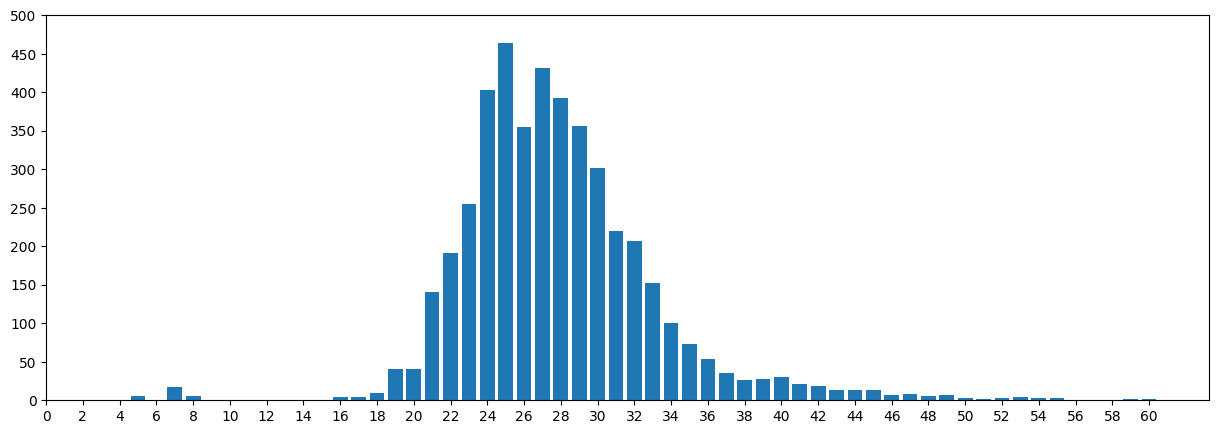

In [18]:
# vẽ biểu đồ thể hiện số lượng khách hàng theo độ tuổi
fig, ax = plt.subplots(figsize=(15,5))

ax = plt.bar(x = "age", height= "count", data=age_count)
plt.xticks(np.arange(0,61,2))
plt.yticks(np.arange(0,501,50))
plt.show()

In [19]:
# tính tổng số lượng khách hàng theo giới tính
gender_count = customer["gender"].value_counts()
gender_count

gender
Nữ     2405
Nam    2070
Name: count, dtype: int64

In [20]:
# tính tổng số lượng khách hàng theo công việc
job_count = customer["job"].value_counts().reset_index()
job_count

,job,count
0,student,1251
1,teenager,1118
2,specialist,725
3,white collar,697
4,blue collar,684


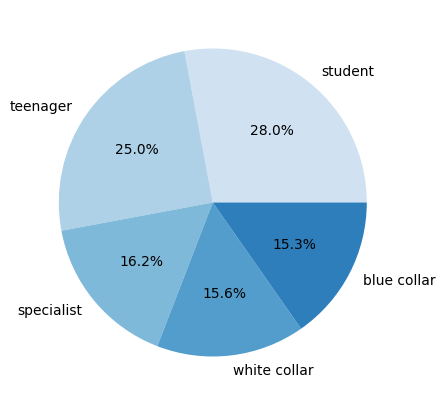

In [21]:
# vẽ biểu đồ thể hiện tổng số lượng khách hàng theo công việc
fix , ax = plt.subplots(figsize=(10,5))

x = [x for x in range(len(job_count))]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

ax.pie(x="count",labels="job",colors=colors , autopct="%1.1f%%", data=job_count)
plt.show()

In [22]:
# tính tổng số lượng vé được đặt trên website
website_order_count = ticket["orderid"].isnull().sum()
website_order_count

96

In [23]:
# tính tổng số lượng vé theo thời gian chiếu
time_count = ticket["time"].value_counts().sort_values(ascending=False).reset_index()
time_count.head(10)

,time,count
0,19:15:00,1583
1,19:35:00,1089
2,19:30:00,1087
3,15:00:00,972
4,19:00:00,922
5,18:15:00,895
6,20:20:00,745
7,15:20:00,674
8,21:30:00,652
9,20:15:00,610


In [30]:
# Khoảng thời gian vé được bán 
ticket["date"].agg(["min", "max"])

min    2019-05-01
max    2019-05-31
Name: date, dtype: object

In [24]:
# thêm cột "day_nam" hiển thị thứ từ cột "date"
day_list = ticket["date"].tolist()
day_name_list = []
for day in day_list:
    day_name = day.strftime("%A")
    day_name_list.append(day_name)
ticket.insert(7,"day_name",day_name_list)
ticket["saledate"] = ticket["saledate"].dt.strftime('%Y-%m-%d')
ticket["date"] = ticket["date"].dt.strftime('%Y-%m-%d')
ticket

,orderid,cashier,saledate,total,customerid,ticketcode,date,day_name,time,slot,room,film,slot_type,ticket_type,ticket_price,popcorn
0,10006052019B0225,emp002,2019-05-06,90000.0,0000000014,20074925,2019-05-06,Monday,18:15:00,G04,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
1,10006052019B0225,emp002,2019-05-06,90000.0,0000000014,20074924,2019-05-06,Monday,18:15:00,G03,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
2,10022052019B0167,emp011,2019-05-22,90000.0,0000000034,20097042,2019-05-22,Wednesday,20:45:00,E04,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
3,10022052019B0167,emp011,2019-05-22,90000.0,0000000034,20097041,2019-05-22,Wednesday,20:45:00,E03,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
4,10130052019B0141,emp005,2019-05-30,90000.0,0000000034,20106761,2019-05-30,Thursday,19:30:00,F04,1,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,45000,Không
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35469,10130052019B0192,emp005,2019-05-30,180000.0,WEBS00000044909,20107072,2019-05-30,Thursday,21:35:00,B10,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35470,10130052019B0192,emp005,2019-05-30,180000.0,WEBS00000044909,20107071,2019-05-30,Thursday,21:35:00,B09,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35471,10130052019B0192,emp005,2019-05-30,180000.0,WEBS00000044909,20107069,2019-05-30,Thursday,21:35:00,B07,4,CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13),ĐƠN,Thành viên,45000,Không
35472,12508052019B0036,emp007,2019-05-08,90000.0,WEBS00000046015,20077797,2019-05-08,Wednesday,19:15:00,C14,4,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không


In [25]:
# tính tổng số lượng và doanh thu theo ngày trong tháng
ticket_count_month = ticket["date"].value_counts().sort_index().reset_index()
ticket_price_sum_month = ticket.groupby("date").sum("ticket_price")["ticket_price"].sort_index().reset_index()
ticket_month = pd.merge(ticket_count_month, ticket_price_sum_month, how="outer", on="date")
ticket_month

,date,count,ticket_price
0,2019-05-01,827,64405000
1,2019-05-02,1284,59985000
2,2019-05-03,154,7425000
3,2019-05-05,1906,89640000
4,2019-05-06,1221,57825000
5,2019-05-07,1083,51615000
6,2019-05-08,1114,52830000
7,2019-05-09,1397,65970000
8,2019-05-10,1469,68805000
9,2019-05-11,2094,97560000


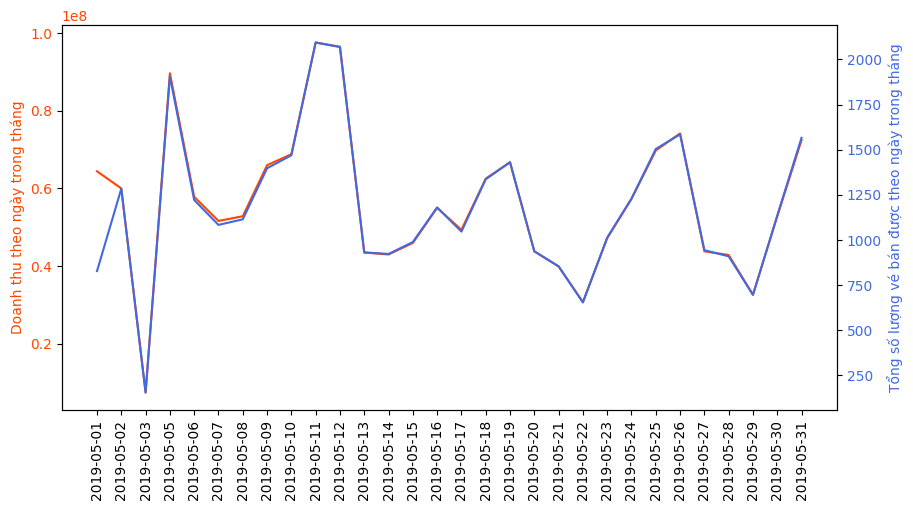

In [26]:
# vẽ biểu đồ thể hiện tổng số lượng và doanh thu theo ngày trong tháng
fig, ax = plt.subplots(figsize=(10,5))

color1 = "orangered"
color2 = "royalblue"

ax.plot("date", "ticket_price", data=ticket_month, color=color1)
ax.set_ylabel('Doanh thu theo ngày trong tháng', color=color1)
ax.tick_params(axis='y', labelcolor=color1)
ax2 = ax.twinx()
ax2.plot("date", "count", data=ticket_month,color=color2)
ax2.set_ylabel('Tổng số lượng vé bán được theo ngày trong tháng', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax.set_xticks(range(len(ticket_month["date"])))
ax.set_xticklabels(ticket_month["date"], rotation=90)
plt.show()

In [27]:
# tính tổng số lượng và doanh thu theo ngày trong tuần
order = ["Monday", "Tuesday", "Wednesday","Thursday" , "Friday", "Saturday", "Sunday"]
ticket_count_week = ticket["day_name"].value_counts().reindex(order).reset_index()
ticket_price_sum_week = ticket.groupby("day_name").sum("ticket_price")["ticket_price"].reindex(order).reset_index()
ticket_week = pd.merge(ticket_count_week, ticket_price_sum_week, how= "outer", on = "day_name")
ticket_week

,day_name,count,ticket_price
0,Monday,4032,188865000
1,Tuesday,3768,177300000
2,Wednesday,4277,226540000
3,Thursday,6009,280890000
4,Friday,5464,255285000
5,Saturday,4934,229815000
6,Sunday,6990,327015000


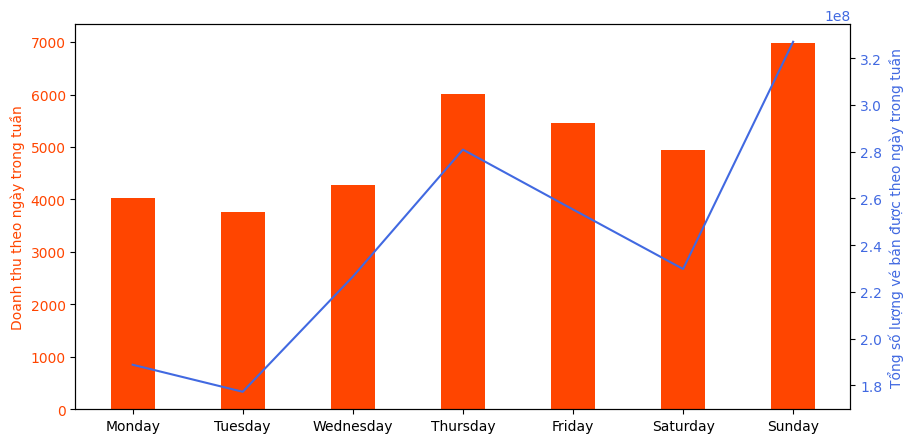

In [28]:
# vẽ biểu đồ thể hiện tổng số lượng và doanh thu theo ngày trong tuần
fix, ax = plt.subplots(figsize=(10,5))

ax.bar(x = "day_name", height= "count", width=0.4, data=ticket_week, color=color1)
ax.set_ylabel('Doanh thu theo ngày trong tuần', color=color1)
ax.tick_params(axis='y', labelcolor=color1)
ax2 = ax.twinx()
ax2.plot("day_name", "ticket_price", data=ticket_week, color=color2)
ax2.set_ylabel('Tổng số lượng vé bán được theo ngày trong tuần', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.show()

In [29]:
# xuất dữ liệu ra từng file tương ứng
customer.to_excel("data/customer.xlsx",index=False)
ticket.to_excel("data/ticket.xlsx", index=False)
film.to_excel("data/film.xlsx", index=False)